# 00. 프로젝트 개요
---
### 프로젝트 목표
* 온라인 코딩 교육을 통해 학습한 내용을 토대로 실제 공공 데이터에 적용 및 활용
* '서울 열린데이터 광장'의 '물가정보 데이터'를 이용한 분석을 통해 유의미한 인사이트 도출
<br></br>

### 프로젝트 목차
01. 데이터 읽기
02. 데이터 정제
03. 데이터 시각화
<br></br>

### 프로젝트 개요
* **프로젝트 내용** : 물가정보는 대형마트와 전통시장에서 판매되는 농수축산물 가격과 장바구니 물가조사 자료 등을 공개하는 데이터셋입니다. 해당 데이터셋을 이용하여 마트 또는 시장 간 농수축산물의 물가 비교가 가능하고, 판매 품목을 확인할 수 있습니다.
   

* **프로젝트 기대효과** : 시민들이 마트 또는 시장 간 농수축산물 물가를 비교하고, 구입하고자 하는 물건의 양을 정하는 등 시민들이 의사결정을 할 수 있게 도와주는 기초자료로 활용 가능합니다.  시민의 합리적인 소비행동을 안내하고, 이를 지원하는 웹 서비스 또는 모바일 APP을 개발할 수 있습니다.         
<br></br>

### 데이터 출처

['서울 열린데이터 광장'의 '물가정보 데이터'](https://data.seoul.go.kr/dataList/18/literacyView.do)를 이용한 데이터 분석 프로젝트입니다.    
<br></br>


# 01. 데이터 읽기
---

### 1.0. 환경 세팅
필요한 패키지를 설치하고, 발생 오류를 해결합니다.
<br></br>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# matplotlib과 seaborn의 경우 한글로 된 데이터를 시각화 할 때 한글이 깨져서 나오는 경우 해결
import matplotlib.font_manager as fm


# 원하는 폰트를 경로에서 불러와서 적용하는 방법
# from matplotlib import font_manager,rc
# font_path = "/content/drive/MyDrive/project_data/NANUMGOTHIC.TTF"
# font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family = font)


# 폰트 리스트 중에 원하는 폰트를 적용 => Colab에서의 오류로 인해 다른 코드 적용
# plt.rcParams['font.family'] = 'DejaVu Serif'
# plt.rcParams['axes.unicode_minus'] = False


# 내 컴퓨터에 설치된 폰트 리스트 확인
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['cmsy10',
 'cmb10',
 'STIXNonUnicode',
 'DejaVu Sans',
 'DejaVu Serif',
 'STIXSizeFourSym',
 'STIXGeneral',
 'DejaVu Sans',
 'cmtt10',
 'DejaVu Sans Mono',
 'STIXSizeFourSym',
 'cmr10',
 'STIXGeneral',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'STIXNonUnicode',
 'DejaVu Serif',
 'DejaVu Serif Display',
 'DejaVu Serif',
 'STIXSizeOneSym',
 'STIXNonUnicode',
 'STIXSizeOneSym',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'DejaVu Serif',
 'STIXSizeFiveSym',
 'STIXSizeTwoSym',
 'cmex10',
 'STIXGeneral',
 'DejaVu Sans Display',
 'STIXSizeThreeSym',
 'STIXSizeThreeSym',
 'DejaVu Sans Mono',
 'cmss10',
 'DejaVu Sans',
 'cmmi10',
 'STIXSizeTwoSym',
 'HYMyeongJo-Extra',
 'Segoe UI',
 'Ebrima',
 'Gabriola',
 'Lucida Bright',
 'Batang',
 'Berlin Sans FB',
 'Verdana',
 'Gill Sans Ultra Bold',
 'Rockwell Extra Bold',
 'MingLiU-ExtB',
 'Tahoma',
 'Candara',
 'STLiti',
 'Segoe UI',
 'Segoe UI',
 'Lucida Sans Typewriter',
 'Calisto MT',
 'FZYaoTi',
 'Book Antiqua',
 'Consolas',
 'Segoe UI His

In [3]:
# 나눔 폰트 설치 (Nanum)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [4]:
# matplotlib의 폰트를 Nanum 폰트로 지정합니다.
plt.rc('font', family='NanumBarunGothic')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
C:\Users\dohoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dohoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dohoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
C:\Users\dohoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dohoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current fo

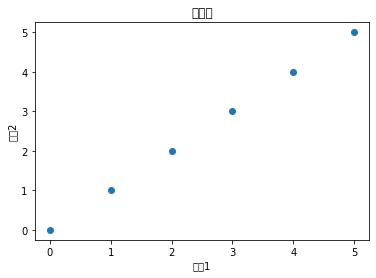

In [5]:
# 한글 깨짐 확인용 그래프 그리기
plt.scatter([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5])
plt.title('산점도')
plt.xlabel('변수1')
plt.ylabel('변수2')
plt.grid(False)
plt.show()

<br></br>

### 1.1. 데이터 불러오기

데이터를 읽고 어떠한 데이터가 저장되어 있는지 확인합니다.
<br></br>

In [22]:
# pd.read_csv를 통하여 dataframe 형태로 데이터를 읽어온다.
# 한글 전용 인코딩 방식 'cp949' 사용을 통해 한글이 포함된 csv 파일을 오류 없이 불러온다.
pd.set_option('display.max_rows', 40) # 데이터의 출력 개수 제한을 두지 않습니다. => rows
pd.set_option('display.max_columns', 40) # 데이터의 출력 개수 제한을 두지 않습니다. => columns

price_all = pd.read_csv("./생필품.csv",encoding="cp949")
price_all.head()

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1636107,226,롯데마트 구로점,28,사과,1개 (300g),1598,2021-01,"국내산,부사",2,대형마트,530000,구로구,2021-01-21
1,1636108,226,롯데마트 구로점,27,배,1개 (600g),1590,2021-01,"국내산,신고",2,대형마트,530000,구로구,2021-01-21
2,1636109,226,롯데마트 구로점,26,배추,1포기(2kg),3990,2021-01,국내산,2,대형마트,530000,구로구,2021-01-21
3,1636110,226,롯데마트 구로점,25,무,1개 (900g),1990,2021-01,국내산,2,대형마트,530000,구로구,2021-01-21
4,1636111,226,롯데마트 구로점,24,양파,1개 (200g),990,2021-01,국내산,2,대형마트,530000,구로구,2021-01-21


In [23]:
# 상위 5개 데이터를 출력한다.
price_all.head()

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1636107,226,롯데마트 구로점,28,사과,1개 (300g),1598,2021-01,"국내산,부사",2,대형마트,530000,구로구,2021-01-21
1,1636108,226,롯데마트 구로점,27,배,1개 (600g),1590,2021-01,"국내산,신고",2,대형마트,530000,구로구,2021-01-21
2,1636109,226,롯데마트 구로점,26,배추,1포기(2kg),3990,2021-01,국내산,2,대형마트,530000,구로구,2021-01-21
3,1636110,226,롯데마트 구로점,25,무,1개 (900g),1990,2021-01,국내산,2,대형마트,530000,구로구,2021-01-21
4,1636111,226,롯데마트 구로점,24,양파,1개 (200g),990,2021-01,국내산,2,대형마트,530000,구로구,2021-01-21


In [24]:
# 하위 5개 데이터를 출력한다.
price_all.tail()

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
89894,1724775,154,홈플러스 강동점,320,달걀(30개),특란,6490,2021-12,국내산,2,대형마트,740000,강동구,2021-12-30
89895,1724776,154,홈플러스 강동점,144,"조기(국산,냉동)",1마리,1190,2021-12,국내산3마리3570,2,대형마트,740000,강동구,2021-12-30
89896,1724777,154,홈플러스 강동점,264,"명태(냉동,수입산)",1마리,3490,2021-12,수입산(러시아),2,대형마트,740000,강동구,2021-12-30
89897,1724778,154,홈플러스 강동점,256,"오징어(냉동,국산)",1마리,4980,2021-12,국내산,2,대형마트,740000,강동구,2021-12-30
89898,1724779,154,홈플러스 강동점,266,"고등어(생물,국산)",1마리,3990,2021-12,국내산2마리7980,2,대형마트,740000,강동구,2021-12-30


In [25]:
# dataframe 정보를 요약하여 출력한다.
# info()를 통하여 데이터 수와 데이터 타입 등을 알 수 있다.
price_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89899 entries, 0 to 89898
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   일련번호               89899 non-null  int64 
 1   시장/마트 번호           89899 non-null  int64 
 2   시장/마트 이름           89899 non-null  object
 3   품목 번호              89899 non-null  int64 
 4   품목 이름              89855 non-null  object
 5   실판매규격              89899 non-null  object
 6   가격(원)              89899 non-null  int64 
 7   년도-월               89899 non-null  object
 8   비고                 89452 non-null  object
 9   시장유형 구분(시장/마트) 코드  89899 non-null  int64 
 10  시장유형 구분(시장/마트) 이름  89899 non-null  object
 11  자치구 코드             89899 non-null  int64 
 12  자치구 이름             89899 non-null  object
 13  점검일자               89899 non-null  object
dtypes: int64(6), object(8)
memory usage: 9.6+ MB


In [26]:
# 숫자가 지수표현식으로 나오는 것을 실수 표현 가능하도록 변경해줍니다. 
pd.options.display.float_format = '{:5f}'.format

# describe()을 통하여 컬럼 별 총 데이터 수, 숫자형 데이터 값의 분포도, 평균값, 최대값, 최솟값을 알 수 있습니다.
price_all.describe()

,일련번호,시장/마트 번호,품목 번호,가격(원),시장유형 구분(시장/마트) 코드,자치구 코드
count,89899.000000,89899.000000,89899.000000,89899.000000,89899.000000,89899.000000
mean,1676908.911834,104.447057,202.600652,32968.842801,1.510729,417398.969955
std,26491.420828,69.284623,115.040611,7984544.099452,0.499888,185624.236611
min,1631289.000000,1.000000,13.000000,0.000000,1.000000,110000.000000
25%,1653831.500000,45.000000,82.000000,2180.000000,1.000000,260000.000000
50%,1677260.000000,94.000000,260.000000,3980.000000,2.000000,410000.000000
75%,1699785.500000,147.000000,307.000000,6500.000000,2.000000,560000.000000
max,1724779.000000,229.000000,324.000000,2394023940.000000,2.000000,740000.000000


In [27]:
# unique : 중복을 제거한 종류의 수
# top : 가장 많은 빈도 수를 갖는 수
# freq : top에 해당하는 변수의 빈도 수
price_all.describe(include = np.object_)

,시장/마트 이름,품목 이름,실판매규격,년도-월,비고,시장유형 구분(시장/마트) 이름,자치구 이름,점검일자
count,89899,89855,89899,89899,89452,89899,89899,89899
unique,103,81,4557,12,9451,2,25,24
top,홈플러스 목동점,달걀(10개),1개,2021-12,국내산,대형마트,중구,2021-12-30
freq,1066,5183,13931,10004,18370,45914,5406,9816


<br></br>

# 02. 데이터 정제
---

데이터를 읽고 확인한 뒤 결측값(missing data), 이상치(outlier)를 처리하는 데이터 정제 과정을 수행합니다.
<br></br>

In [28]:
# 중복 데이터 확인 및 삭제
# 중복 데이터가 없는 것을 확인할 수 있다.
price_all.duplicated().sum()

0

In [29]:
# 결측치 확인
# 결측치가 가장 큰 것은 '비고'이다.
price_all.isnull().sum()

일련번호                   0
시장/마트 번호               0
시장/마트 이름               0
품목 번호                  0
품목 이름                 44
실판매규격                  0
가격(원)                  0
년도-월                   0
비고                   447
시장유형 구분(시장/마트) 코드      0
시장유형 구분(시장/마트) 이름      0
자치구 코드                 0
자치구 이름                 0
점검일자                   0
dtype: int64

In [30]:
# 결측치 처리 -> '비고' 제거
price_all.dropna(subset = ['비고'], inplace = True)

In [31]:
# dataframe.drop()를 사용항 불필요한 column 데이터 삭제 가능
# price_del_col = price_all.drop(columns = ['column1', 'column2'])

In [32]:
# 정제 처리된 dataframe 정보를 출력
price_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89452 entries, 0 to 89898
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   일련번호               89452 non-null  int64 
 1   시장/마트 번호           89452 non-null  int64 
 2   시장/마트 이름           89452 non-null  object
 3   품목 번호              89452 non-null  int64 
 4   품목 이름              89408 non-null  object
 5   실판매규격              89452 non-null  object
 6   가격(원)              89452 non-null  int64 
 7   년도-월               89452 non-null  object
 8   비고                 89452 non-null  object
 9   시장유형 구분(시장/마트) 코드  89452 non-null  int64 
 10  시장유형 구분(시장/마트) 이름  89452 non-null  object
 11  자치구 코드             89452 non-null  int64 
 12  자치구 이름             89452 non-null  object
 13  점검일자               89452 non-null  object
dtypes: int64(6), object(8)
memory usage: 10.2+ MB


<br></br>

# 03. 데이터 시각화
---

데이터 정제를 완료한 price_all 데이터를 바탕으로 각 column의 변수별로 어떠한 데이터 분포를 하고 있는지 시각화를 통해 알아봅니다.
<br></br>

### 3.1. 가장 많은 시장/마트를 소유한 자치구 추출

추출한 price_all 데이터를 활용해 가장 많은 시장/마트를 소유한 자치구를 출력해 보겠습니다.

In [33]:
# 분석 시 필요한 컬럼만 가져오기
compare_region = price_all[['시장/마트 이름', '시장유형 구분(시장/마트) 이름', '자치구 이름', '품목 이름', '실판매규격', '가격(원)']]
compare_region

,시장/마트 이름,시장유형 구분(시장/마트) 이름,자치구 이름,품목 이름,실판매규격,가격(원)
0,롯데마트 구로점,대형마트,구로구,사과,1개 (300g),1598
1,롯데마트 구로점,대형마트,구로구,배,1개 (600g),1590
2,롯데마트 구로점,대형마트,구로구,배추,1포기(2kg),3990
3,롯데마트 구로점,대형마트,구로구,무,1개 (900g),1990
4,롯데마트 구로점,대형마트,구로구,양파,1개 (200g),990
...,...,...,...,...,...,...
89894,홈플러스 강동점,대형마트,강동구,달걀(30개),특란,6490
89895,홈플러스 강동점,대형마트,강동구,"조기(국산,냉동)",1마리,1190
89896,홈플러스 강동점,대형마트,강동구,"명태(냉동,수입산)",1마리,3490
89897,홈플러스 강동점,대형마트,강동구,"오징어(냉동,국산)",1마리,4980


In [34]:
# 자치구 별 대형마트와 전통시장 종류 개수를 출력하기 위한 필요 컬럼 가져오기
region_count = price_all[['시장/마트 이름', '시장유형 구분(시장/마트) 이름', '자치구 이름']]
region_count

,시장/마트 이름,시장유형 구분(시장/마트) 이름,자치구 이름
0,롯데마트 구로점,대형마트,구로구
1,롯데마트 구로점,대형마트,구로구
2,롯데마트 구로점,대형마트,구로구
3,롯데마트 구로점,대형마트,구로구
4,롯데마트 구로점,대형마트,구로구
...,...,...,...
89894,홈플러스 강동점,대형마트,강동구
89895,홈플러스 강동점,대형마트,강동구
89896,홈플러스 강동점,대형마트,강동구
89897,홈플러스 강동점,대형마트,강동구


In [35]:
# 자치구 별 대형마트와 전통시장 종류 출력
region_total = region_count.groupby(['자치구 이름', '시장유형 구분(시장/마트) 이름', '시장/마트 이름']).sum()

# 하위 10개의 데이터를 출력
region_total.tail(10)

Empty DataFrame
Columns: []
Index: [(중구, 대형마트, 롯데마트 서울역점), (중구, 대형마트, 롯데백화점), (중구, 대형마트, 신세계백화점), (중구, 대형마트, 이마트 청계점), (중구, 전통시장, 남대문시장), (중구, 전통시장, 서울중앙시장), (중랑구, 대형마트, 이마트 상봉점), (중랑구, 대형마트, 홈플러스 면목점), (중랑구, 전통시장, 동원시장), (중랑구, 전통시장, 우림시장)]

In [36]:
# to_frame()은 dataframe 형식으로 바꿔주는 역할을 함
region_total_count = region_count.groupby("자치구 이름")["시장/마트 이름"].nunique().to_frame()

# 자치구 별 대형마트와 전통시장 개수 내림차순으로 보기
# ascending = True (오름차순), ascending = False (내림차순)
region_total_count['시장/마트 이름'].sort_values(ascending=False).to_frame()

,시장/마트 이름
자치구 이름,
중구,6
관악구,5
구로구,5
영등포구,5
도봉구,5
강남구,4
서초구,4
은평구,4
용산구,4


#### 3.1.1. 결론
* 25개의 자치구 중 '중구'의 시장/마트 개수가 6개로 가장 많다.

<br></br>

### 3.2. '중구'의 대형마트에서 판매하는 품목 종류 추출

* 3.1.에서 분석한 결과 자치구 중 '중구'가 가장 많은 시장/마트를 소유한 것으로 나타납니다.

*   자치구 중 가장 시장/마트 수가 많은 '중구'를 기준으로 분석을 진행합니다.
    *   중구/대형마트 : 롯데마트 서울역점, 롯데백화점, 신세계백화점, 이마트 청계점
    *   중구/전통시장 : 남대문시장, 서울중앙시장





In [37]:
compare_region = price_all[['시장/마트 이름', '시장유형 구분(시장/마트) 이름', '자치구 이름', '품목 이름', '실판매규격', '가격(원)']]
compare_region

,시장/마트 이름,시장유형 구분(시장/마트) 이름,자치구 이름,품목 이름,실판매규격,가격(원)
0,롯데마트 구로점,대형마트,구로구,사과,1개 (300g),1598
1,롯데마트 구로점,대형마트,구로구,배,1개 (600g),1590
2,롯데마트 구로점,대형마트,구로구,배추,1포기(2kg),3990
3,롯데마트 구로점,대형마트,구로구,무,1개 (900g),1990
4,롯데마트 구로점,대형마트,구로구,양파,1개 (200g),990
...,...,...,...,...,...,...
89894,홈플러스 강동점,대형마트,강동구,달걀(30개),특란,6490
89895,홈플러스 강동점,대형마트,강동구,"조기(국산,냉동)",1마리,1190
89896,홈플러스 강동점,대형마트,강동구,"명태(냉동,수입산)",1마리,3490
89897,홈플러스 강동점,대형마트,강동구,"오징어(냉동,국산)",1마리,4980


In [38]:
# 중구의 대형마트에서 판매하는 농수축산물 이름, 실판매규격, 가격(원)을 출력
junggu_mart = compare_region[(compare_region['자치구 이름']=='중구') & (compare_region['시장유형 구분(시장/마트) 이름']=='대형마트')]
# 3604 rows × 6 columns 
junggu_mart

,시장/마트 이름,시장유형 구분(시장/마트) 이름,자치구 이름,품목 이름,실판매규격,가격(원)
51,롯데백화점,대형마트,중구,"사과(부사, 300g)",1개,4000
52,롯데백화점,대형마트,중구,"배(신고, 600g)",1개,8000
53,롯데백화점,대형마트,중구,배추,1포기(600g),2980
54,롯데백화점,대형마트,중구,무(세척무),1개,3980
55,롯데백화점,대형마트,중구,양파(1.5kg망),1망(1kg),4580
...,...,...,...,...,...,...
88687,이마트 청계점,대형마트,중구,달걀(30개),30개,6480
88688,이마트 청계점,대형마트,중구,"조기(생물,수입산)",1마리,5980
88689,이마트 청계점,대형마트,중구,"명태(러시아,냉동)",1마리,4980
88690,이마트 청계점,대형마트,중구,"오징어(생물,국산)",1마리,6880


위의 dataframe을 확인했을 때 '중구의 대형마트'에서 판매하는 농수축산물들의 종류가 얼마나 다양한지 확인하기 어렵습니다.

아래와 같이 `롯데마트 서울역점, 롯데백화점, 신세계백화점, 이마트 청계점`을 포함한 '중구의 대형마트'에서 판매하는 품목의 종류를 확인합니다.

코드 실행 결과, 중구의 대형마트에서는 '38개' 종류의 농수축산물들을 소유하고 있음을 확인할 수 있습니다.



In [39]:
# 중구의 대형마트의 판매 품목 종류 확인
# nunique()는 데이터의 고유값들의 수를 출력해주는 함수
junggu_mart.groupby("자치구 이름")["품목 이름"].nunique().to_frame()

,품목 이름
자치구 이름,
중구,38


In [40]:
# 중구의 대형마트에서 판매하는 38개 종류의 농수축산물 목록
junggu_mart.groupby("자치구 이름")["품목 이름"].value_counts().to_frame()

품목 이름
자치구 이름 품목 이름              
중구     달걀(10개)         212
       달걀(30개)         212
       무(세척무)          212
       상추              212
       오이(다다기)         212
       돼지고기(생삼겹살)      211
       사과(부사, 300g)    175
       양파(1.5kg망)      159
       쇠고기(한우,불고기)     158
       닭고기             128
       오징어(생물,국산)      118
       고등어             113
       명태(러시아,냉동)      106
       배(신고, 600g)     106
       배(중품)           106
       배추(중간)          106
       호박(인큐베이터),중간    106
       고등어(생물,국산)       99
       조기(생물,수입산)       89
       닭고기(육계)          84
       오징어              80
       명태(생물,수입산)       55
       배추               53
       배추(2.5~3kg)      53
       애호박              53
       양파               53
       호박(인큐베이터)        53
       명태               51
       조기               41
       사과(부사)           37
       조기(국산,생물)        37
       조기(생물,국산)        33
       쇠고기(한우1등급)       31
       쇠고기              23
       오징어(냉동,국산)       14
       조기(국산,냉동)        11
       돼지고기              1
       조기(냉동,국산)         1

그렇다면 중구의 대형마트에 속해 있는 롯데마트 서울역점, 롯데백화점, 신세계백화점, 이마트 청계점에서는 

각각 몇 종류의 농수축삭물들을 소유하고 있는지 출력하는 코드를 작성하겠습니다.

* 중구/롯데마트 서울역점

In [41]:
# 중구/롯데마트 서울역점
junggu_mart = compare_region[(compare_region['자치구 이름']=='중구') & (compare_region['시장유형 구분(시장/마트) 이름']=='대형마트') & (compare_region['시장/마트 이름']=='롯데마트 서울역점')]
junggu_mart

,시장/마트 이름,시장유형 구분(시장/마트) 이름,자치구 이름,품목 이름,실판매규격,가격(원)
136,롯데마트 서울역점,대형마트,중구,"사과(부사, 300g)",1개,1800
137,롯데마트 서울역점,대형마트,중구,배(중품),1개,4000
138,롯데마트 서울역점,대형마트,중구,배추(중간),1포기(중간),1880
139,롯데마트 서울역점,대형마트,중구,무(세척무),1개,1680
140,롯데마트 서울역점,대형마트,중구,양파(1.5kg망),1망 1.5kg,3880
...,...,...,...,...,...,...
80061,롯데마트 서울역점,대형마트,중구,달걀(30개),30개,6490
80062,롯데마트 서울역점,대형마트,중구,"조기(생물,수입산)",1마리,3980
80063,롯데마트 서울역점,대형마트,중구,"명태(러시아,냉동)",1마리,4980
80064,롯데마트 서울역점,대형마트,중구,"오징어(생물,국산)",1마리,4500


In [42]:
# 중구/롯데마트 서울역점의 판매 품목 종류 확인
junggu_mart.groupby("시장/마트 이름")["품목 이름"].nunique().to_frame()

,품목 이름
시장/마트 이름,
롯데마트 서울역점,21


In [43]:
# 중구/롯데마트 서울역점에서 판매하는 21개 종류의 농수축산물 목록
junggu_mart.groupby("시장/마트 이름")["품목 이름"].value_counts().to_frame()

품목 이름
시장/마트 이름  품목 이름              
롯데마트 서울역점 달걀(10개)          53
          달걀(30개)          53
          닭고기              53
          돼지고기(생삼겹살)       53
          명태(러시아,냉동)       53
          무(세척무)           53
          배(중품)            53
          배추(중간)           53
          상추               53
          쇠고기(한우,불고기)      53
          양파(1.5kg망)       53
          오이(다다기)          53
          호박(인큐베이터),중간     53
          조기(생물,수입산)       43
          사과(부사, 300g)     42
          고등어              40
          오징어              40
          고등어(생물,국산)       13
          오징어(생물,국산)       13
          사과(부사)           11
          조기(생물,국산)        10

<br></br>

* 중구/롯데백화점

In [44]:
# 중구/롯데백화점
junggu_mart = compare_region[(compare_region['자치구 이름']=='중구') & (compare_region['시장유형 구분(시장/마트) 이름']=='대형마트') & (compare_region['시장/마트 이름']=='롯데백화점')]
junggu_mart

,시장/마트 이름,시장유형 구분(시장/마트) 이름,자치구 이름,품목 이름,실판매규격,가격(원)
51,롯데백화점,대형마트,중구,"사과(부사, 300g)",1개,4000
52,롯데백화점,대형마트,중구,"배(신고, 600g)",1개,8000
53,롯데백화점,대형마트,중구,배추,1포기(600g),2980
54,롯데백화점,대형마트,중구,무(세척무),1개,3980
55,롯데백화점,대형마트,중구,양파(1.5kg망),1망(1kg),4580
...,...,...,...,...,...,...
87039,롯데백화점,대형마트,중구,달걀(30개),30개,10800
87040,롯데백화점,대형마트,중구,"조기(생물,국산)",1마리(20cm),4000
87041,롯데백화점,대형마트,중구,명태,1마리(45cm),0
87042,롯데백화점,대형마트,중구,"오징어(생물,국산)",1마리(25cm),8900


In [45]:
# 중구/롯데백화점의 판매 품목 종류 확인
junggu_mart.groupby("시장/마트 이름")["품목 이름"].nunique().to_frame()

,품목 이름
시장/마트 이름,
롯데백화점,24


In [46]:
# 중구/롯데백화점에서 판매하는 24개 종류의 농수축산물 목록
junggu_mart.groupby("시장/마트 이름")["품목 이름"].value_counts().to_frame()

품목 이름
시장/마트 이름 품목 이름              
롯데백화점    고등어(생물,국산)       53
         달걀(10개)          53
         달걀(30개)          53
         닭고기(육계)          53
         돼지고기(생삼겹살)       53
         무(세척무)           53
         배(신고, 600g)      53
         배추               53
         상추               53
         애호박              53
         오이(다다기)          53
         오징어(생물,국산)       46
         사과(부사, 300g)     39
         명태               37
         조기(국산,생물)        37
         쇠고기(한우1등급)       31
         양파(1.5kg망)       31
         쇠고기(한우,불고기)      22
         양파               22
         명태(생물,수입산)       16
         사과(부사)           14
         조기(생물,국산)        13
         오징어(냉동,국산)        7
         조기(생물,수입산)        3

<br></br>

* 중구/신세계백화점

In [47]:
# 중구/신세계백화점
junggu_mart = compare_region[(compare_region['자치구 이름']=='중구') & (compare_region['시장유형 구분(시장/마트) 이름']=='대형마트') & (compare_region['시장/마트 이름']=='신세계백화점')]
junggu_mart

,시장/마트 이름,시장유형 구분(시장/마트) 이름,자치구 이름,품목 이름,실판매규격,가격(원)
68,신세계백화점,대형마트,중구,"사과(부사, 300g)",1개,5400
69,신세계백화점,대형마트,중구,"배(신고, 600g)",1개,7800
70,신세계백화점,대형마트,중구,배추(2.5~3kg),"1포기(2,5kg)",4980
71,신세계백화점,대형마트,중구,무(세척무),"1개(1,5kg)",3500
72,신세계백화점,대형마트,중구,양파,1kg,4500
...,...,...,...,...,...,...
87056,신세계백화점,대형마트,중구,달걀(30개),30개,17360
87057,신세계백화점,대형마트,중구,"조기(냉동,국산)",1마리(20cm),10000
87058,신세계백화점,대형마트,중구,명태,1마리,0
87059,신세계백화점,대형마트,중구,"오징어(생물,국산)",1마리(25cm),7500


In [48]:
# 중구/신세계백화점의 판매 품목 종류 확인
junggu_mart.groupby("시장/마트 이름")["품목 이름"].nunique().to_frame()

,품목 이름
시장/마트 이름,
신세계백화점,25


In [49]:
# 중구/신세계백화점에서 판매하는 25개 종류의 농수축산물 목록
junggu_mart.groupby("시장/마트 이름")["품목 이름"].value_counts().to_frame()

품목 이름
시장/마트 이름 품목 이름              
신세계백화점   달걀(10개)          53
         달걀(30개)          53
         돼지고기(생삼겹살)       53
         무(세척무)           53
         배(신고, 600g)      53
         배추(2.5~3kg)      53
         사과(부사, 300g)     53
         상추               53
         오이(다다기)          53
         호박(인큐베이터)        53
         오징어(생물,국산)       46
         조기               41
         명태(생물,수입산)       39
         고등어              32
         닭고기(육계)          31
         쇠고기(한우,불고기)      31
         양파               31
         닭고기              22
         쇠고기              22
         양파(1.5kg망)       22
         고등어(생물,국산)       21
         명태               14
         조기(국산,냉동)        11
         오징어(냉동,국산)        7
         조기(냉동,국산)         1

<br></br>

* 이마트 청계점

In [50]:
# 중구/이마트 청계점
junggu_mart = compare_region[(compare_region['자치구 이름']=='중구') & (compare_region['시장유형 구분(시장/마트) 이름']=='대형마트') & (compare_region['시장/마트 이름']=='이마트 청계점')]
junggu_mart

,시장/마트 이름,시장유형 구분(시장/마트) 이름,자치구 이름,품목 이름,실판매규격,가격(원)
119,이마트 청계점,대형마트,중구,"사과(부사, 300g)",1개,1800
120,이마트 청계점,대형마트,중구,배(중품),1개,4000
121,이마트 청계점,대형마트,중구,배추(중간),1포기(중간),2580
122,이마트 청계점,대형마트,중구,무(세척무),1개,1580
123,이마트 청계점,대형마트,중구,양파(1.5kg망),1망 1.5kg,3900
...,...,...,...,...,...,...
88687,이마트 청계점,대형마트,중구,달걀(30개),30개,6480
88688,이마트 청계점,대형마트,중구,"조기(생물,수입산)",1마리,5980
88689,이마트 청계점,대형마트,중구,"명태(러시아,냉동)",1마리,4980
88690,이마트 청계점,대형마트,중구,"오징어(생물,국산)",1마리,6880


In [51]:
# 중구/이마트 청계점의 판매 품목 종류 확인
junggu_mart.groupby("시장/마트 이름")["품목 이름"].nunique().to_frame()

,품목 이름
시장/마트 이름,
이마트 청계점,23


In [52]:
# 중구/이마트 청계점에서 판매하는 23개 종류의 농수축산물 목록
junggu_mart.groupby("시장/마트 이름")["품목 이름"].value_counts().to_frame()

품목 이름
시장/마트 이름 품목 이름              
이마트 청계점  달걀(10개)          53
         달걀(30개)          53
         닭고기              53
         명태(러시아,냉동)       53
         무(세척무)           53
         배(중품)            53
         배추(중간)           53
         상추               53
         양파(1.5kg망)       53
         오이(다다기)          53
         호박(인큐베이터),중간     53
         돼지고기(생삼겹살)       52
         쇠고기(한우,불고기)      52
         조기(생물,수입산)       43
         고등어              41
         사과(부사, 300g)     41
         오징어              40
         오징어(생물,국산)       13
         고등어(생물,국산)       12
         사과(부사)           12
         조기(생물,국산)        10
         돼지고기              1
         쇠고기               1

#### 3.2.1. 결론

중구/대형마트의 롯데마트 서울역점, 롯데백화점, 신세계백화점, 이마트 청계점 중 신세계 백화점에서 농수축산물품 종류가 가장 다양합니다.     

=> 중구/대형마트 전체 : 38개
* 롯데마트 서울역점 : 21개
* 롯데백화점 : 24개
* 신세계백화점 : 25개
* 이마트 청계점 : 23개




<br></br>

### 3.3. '중구'의 전통시장에서 판매하는 품목 종류 추출
*   자치구 중 가장 시장/마트 수가 많은 '중구'를 기준으로 분석을 진행합니다.
    *   중구/대형마트 : 롯데마트 서울역점, 롯데백화점, 신세계백화점, 이마트 청계점
    *   중구/전통시장 : 남대문시장, 서울중앙시장


In [53]:
# 중구의 전통시장에서 판매하는 농수축산물 이름, 실판매 규격, 가격(원)을 출력
junggu_market = compare_region[(compare_region['자치구 이름']=='중구') & (compare_region['시장유형 구분(시장/마트) 이름']=='전통시장')]
# 1802 rows x 6 columns
junggu_market

,시장/마트 이름,시장유형 구분(시장/마트) 이름,자치구 이름,품목 이름,실판매규격,가격(원)
85,남대문시장,전통시장,중구,"사과(부사, 300g)",1개,1650
86,남대문시장,전통시장,중구,배(중품),1개,4000
87,남대문시장,전통시장,중구,배추(중간),1포기(중간),3000
88,남대문시장,전통시장,중구,무(세척무),1개,1500
89,남대문시장,전통시장,중구,양파(1.5kg망),1망 1.5kg,3700
...,...,...,...,...,...,...
88721,남대문시장,전통시장,중구,달걀(30개),30개,7000
88722,남대문시장,전통시장,중구,"조기(냉동,수입산)",1마리,3500
88723,남대문시장,전통시장,중구,"명태(러시아,냉동)",1마리,4000
88724,남대문시장,전통시장,중구,"오징어(생물,국산)",1마리,4500


In [54]:
# 중구의 전통시장의 판매 품목 종류 확인
junggu_market.groupby("자치구 이름")["품목 이름"].nunique().to_frame()

,품목 이름
자치구 이름,
중구,21


In [55]:
# 중구의 전통시장에서 판매하는 21개 종류의 농수축산물 목록
junggu_market.groupby("자치구 이름")["품목 이름"].value_counts().to_frame()

품목 이름
자치구 이름 품목 이름              
중구     달걀(10개)         106
       달걀(30개)         106
       닭고기             106
       명태(러시아,냉동)      106
       무(세척무)          106
       배(중품)           106
       배추(중간)          106
       사과(부사, 300g)    106
       상추(100g)        106
       양파(1.5kg망)      106
       오이(다다기)         106
       조기(냉동,수입산)      106
       호박(인큐베이터),중간    106
       돼지고기(생삼겹살)      104
       쇠고기(한우,불고기)     104
       고등어              89
       오징어              81
       오징어(생물,국산)       25
       고등어(생물,국산)       17
       돼지고기              2
       쇠고기               2

그렇다면 중구의 전통시장에 속해 있는 남대문시장, 서울중앙시장에서는      

각각 몇 종류의 농수축산물들을 소유하고 있는지 출력하는 코드를 작성하겠습니다.

* 중구/남대문시장

In [56]:
# 중구/남대문시장
junggu_market = compare_region[(compare_region['자치구 이름']=='중구') & (compare_region['시장유형 구분(시장/마트) 이름']=='전통시장') & (compare_region['시장/마트 이름']=='남대문시장')]
junggu_market

,시장/마트 이름,시장유형 구분(시장/마트) 이름,자치구 이름,품목 이름,실판매규격,가격(원)
85,남대문시장,전통시장,중구,"사과(부사, 300g)",1개,1650
86,남대문시장,전통시장,중구,배(중품),1개,4000
87,남대문시장,전통시장,중구,배추(중간),1포기(중간),3000
88,남대문시장,전통시장,중구,무(세척무),1개,1500
89,남대문시장,전통시장,중구,양파(1.5kg망),1망 1.5kg,3700
...,...,...,...,...,...,...
88721,남대문시장,전통시장,중구,달걀(30개),30개,7000
88722,남대문시장,전통시장,중구,"조기(냉동,수입산)",1마리,3500
88723,남대문시장,전통시장,중구,"명태(러시아,냉동)",1마리,4000
88724,남대문시장,전통시장,중구,"오징어(생물,국산)",1마리,4500


In [57]:
# 중구/남대문시장의 판매 품목 종류 확인
junggu_market.groupby("시장/마트 이름")["품목 이름"].nunique().to_frame()

,품목 이름
시장/마트 이름,
남대문시장,21


In [58]:
# 중구/남대문시장에서 판매하는 21개 종류의 농수축산물 목록
junggu_market.groupby("시장/마트 이름")["품목 이름"].value_counts().to_frame()

품목 이름
시장/마트 이름 품목 이름              
남대문시장    달걀(10개)          53
         달걀(30개)          53
         닭고기              53
         명태(러시아,냉동)       53
         무(세척무)           53
         배(중품)            53
         배추(중간)           53
         사과(부사, 300g)     53
         상추(100g)         53
         양파(1.5kg망)       53
         오이(다다기)          53
         조기(냉동,수입산)       53
         호박(인큐베이터),중간     53
         돼지고기(생삼겹살)       52
         쇠고기(한우,불고기)      52
         고등어              45
         오징어              40
         오징어(생물,국산)       13
         고등어(생물,국산)        8
         돼지고기              1
         쇠고기               1

<br></br>

* 중구/서울중앙시장

In [59]:
# 중구/서울중앙시장
junggu_market = compare_region[(compare_region['자치구 이름']=='중구') & (compare_region['시장유형 구분(시장/마트) 이름']=='전통시장') & (compare_region['시장/마트 이름']=='서울중앙시장')]
junggu_market

,시장/마트 이름,시장유형 구분(시장/마트) 이름,자치구 이름,품목 이름,실판매규격,가격(원)
102,서울중앙시장,전통시장,중구,"사과(부사, 300g)",1개,1600
103,서울중앙시장,전통시장,중구,배(중품),1개,4000
104,서울중앙시장,전통시장,중구,배추(중간),1포기(중간),3000
105,서울중앙시장,전통시장,중구,무(세척무),1개,1500
106,서울중앙시장,전통시장,중구,양파(1.5kg망),1망 1.5kg,3650
...,...,...,...,...,...,...
88704,서울중앙시장,전통시장,중구,달걀(30개),30개,6800
88705,서울중앙시장,전통시장,중구,"조기(냉동,수입산)",1마리,3500
88706,서울중앙시장,전통시장,중구,"명태(러시아,냉동)",1마리,4000
88707,서울중앙시장,전통시장,중구,"오징어(생물,국산)",1마리,4500


In [60]:
# 중구/서울중앙시장의 판매 품목 종류 확인
junggu_market.groupby("시장/마트 이름")["품목 이름"].nunique().to_frame()

,품목 이름
시장/마트 이름,
서울중앙시장,21


In [61]:
# 중구/서울중앙시장에서 판매하는 21개 종류의 농수축산물 목록
junggu_market.groupby("시장/마트 이름")["품목 이름"].value_counts().to_frame()

품목 이름
시장/마트 이름 품목 이름              
서울중앙시장   달걀(10개)          53
         달걀(30개)          53
         닭고기              53
         명태(러시아,냉동)       53
         무(세척무)           53
         배(중품)            53
         배추(중간)           53
         사과(부사, 300g)     53
         상추(100g)         53
         양파(1.5kg망)       53
         오이(다다기)          53
         조기(냉동,수입산)       53
         호박(인큐베이터),중간     53
         돼지고기(생삼겹살)       52
         쇠고기(한우,불고기)      52
         고등어              44
         오징어              41
         오징어(생물,국산)       12
         고등어(생물,국산)        9
         돼지고기              1
         쇠고기               1

#### 3.3.1. 결론

중구/전통시장의 남대문시장, 서울중앙시장은 농수축산물품 종류가 21개로 같습니다.     

=> 중구/전통시장 전체 : 21개
* 남대문시장 : 21개
* 서울중앙시장 : 21개       




<br></br>

#### 3.3.2. 결론

* 가정 : 전통시장보다 대형마트의 판매 물품 종류가 더 다양할 것으로 예상합니다.  

* 결과 : 자치구 중 시장/마트를 가장 많이 보유하고 있는 '중구'를 대상으로 분석하였습니다.
    *   대형마트의 판매 물품 종류가 38개, 전통시장의 판매 물품 종류가 21개로 **대형마트가 더 다양한 품목을 소유하고 있습니다.**
    *   대형마트 중에서도 신세계백화점의 물품 종류가 25개로 가장 다양합니다.



<br></br>

### 3.4. '중구'의 대형마트에서 판매하는 품목 별 평균 가격대

In [62]:
compare_region = price_all[['시장/마트 이름', '시장유형 구분(시장/마트) 이름', '자치구 이름', '품목 이름', '가격(원)']]
compare_region

,시장/마트 이름,시장유형 구분(시장/마트) 이름,자치구 이름,품목 이름,가격(원)
0,롯데마트 구로점,대형마트,구로구,사과,1598
1,롯데마트 구로점,대형마트,구로구,배,1590
2,롯데마트 구로점,대형마트,구로구,배추,3990
3,롯데마트 구로점,대형마트,구로구,무,1990
4,롯데마트 구로점,대형마트,구로구,양파,990
...,...,...,...,...,...
89894,홈플러스 강동점,대형마트,강동구,달걀(30개),6490
89895,홈플러스 강동점,대형마트,강동구,"조기(국산,냉동)",1190
89896,홈플러스 강동점,대형마트,강동구,"명태(냉동,수입산)",3490
89897,홈플러스 강동점,대형마트,강동구,"오징어(냉동,국산)",4980


In [63]:
# 중구의 대형마트에서 판매하는 농수축산물 이름, 실판매규격, 가격(원)을 출력
junggu_mart = compare_region[(compare_region['자치구 이름']=='중구') & (compare_region['시장유형 구분(시장/마트) 이름']=='대형마트')]
junggu_mart

,시장/마트 이름,시장유형 구분(시장/마트) 이름,자치구 이름,품목 이름,가격(원)
51,롯데백화점,대형마트,중구,"사과(부사, 300g)",4000
52,롯데백화점,대형마트,중구,"배(신고, 600g)",8000
53,롯데백화점,대형마트,중구,배추,2980
54,롯데백화점,대형마트,중구,무(세척무),3980
55,롯데백화점,대형마트,중구,양파(1.5kg망),4580
...,...,...,...,...,...
88687,이마트 청계점,대형마트,중구,달걀(30개),6480
88688,이마트 청계점,대형마트,중구,"조기(생물,수입산)",5980
88689,이마트 청계점,대형마트,중구,"명태(러시아,냉동)",4980
88690,이마트 청계점,대형마트,중구,"오징어(생물,국산)",6880


In [64]:
# 중구의 대형마트에서 판매하는 38개 종류의 농수축산물 목록
junggu_mart.groupby("자치구 이름")["품목 이름"].value_counts().to_frame()

품목 이름
자치구 이름 품목 이름              
중구     달걀(10개)         212
       달걀(30개)         212
       무(세척무)          212
       상추              212
       오이(다다기)         212
       돼지고기(생삼겹살)      211
       사과(부사, 300g)    175
       양파(1.5kg망)      159
       쇠고기(한우,불고기)     158
       닭고기             128
       오징어(생물,국산)      118
       고등어             113
       명태(러시아,냉동)      106
       배(신고, 600g)     106
       배(중품)           106
       배추(중간)          106
       호박(인큐베이터),중간    106
       고등어(생물,국산)       99
       조기(생물,수입산)       89
       닭고기(육계)          84
       오징어              80
       명태(생물,수입산)       55
       배추               53
       배추(2.5~3kg)      53
       애호박              53
       양파               53
       호박(인큐베이터)        53
       명태               51
       조기               41
       사과(부사)           37
       조기(국산,생물)        37
       조기(생물,국산)        33
       쇠고기(한우1등급)       31
       쇠고기              23
       오징어(냉동,국산)       14
       조기(국산,냉동)        11
       돼지고기              1
       조기(냉동,국산)         1

In [65]:
# 중구/대형마트의 전체 품목 별 가격의 평균 값(mean) 구하기
# as_index=False 구문은 이 그룹을 인덱스로 지정할 것인지의 여부이며, 지정하게 되면 그룹이 인덱스로 들어가게 됩니다.
junggu_mart_price_mean =  junggu_mart.groupby(['품목 이름'], as_index=False)['가격(원)'].mean()
junggu_mart_price_mean

# 또는 junggu_mart.groupby("품목 이름")["가격(원)"].mean()
# 또는 junggu_mart.pivot_table(index = "품목 이름", values = "가격(원)") 
# => pivot_table은 groupby 명령처럼 그룹분석을 하지만 최종적으로는 pivot 명령처럼 피봇 테이블을 만듭니다.

,품목 이름,가격(원)
0,고등어,5180.353982
1,"고등어(생물,국산)",8311.616162
2,달걀(10개),5699.858491
3,달걀(30개),11440.000000
4,닭고기,7605.625000
5,닭고기(육계),10647.023810
6,돼지고기,15480.000000
7,돼지고기(생삼겹살),11359013.412322
8,명태,127.450980
9,"명태(러시아,냉동)",5029.150943


* 오류 해결
    * 각 품목의 평균 값을 알아본 결과 index 7(돼지고기 생삼겹살), index 8(명태) 항목의 값이 이상하다는 것을 알 수 있습니다.
        * index 7(돼지고기 생삼겹살)의 값을 아래의 코드로 전체 살펴본 결과 index 55890의 값이 지나치게 크다는 것을 알 수 있습니다.
        * index 7(돼지고기 생삽결살)의 모든 항목을 삭제하여 분석합니다.
        * index 8, 9, 10(명태)의 모든 항목을 삭제하여 분석합니다.

In [66]:
# 돼지고기 생삼겹살 가격 확인

# pd.set_option('display.max_rows', None) # 데이터의 출력 개수 제한을 두지 않습니다. 
# pd.set_option('display.max_columns', None) # 데이터의 출력 개수 제한을 두지 않습니다. 
# => 위의 코드 사용 시 실행 속도가 굉장히 느려질 수 있으니 주의합니다.

# junggu_mart = compare_region[(compare_region['자치구 이름']=='중구') & (compare_region['시장유형 구분(시장/마트) 이름']=='대형마트') & (compare_region['품목 이름']=='돼지고기(생삼겹살)')]
# junggu_mart

In [67]:
# 명태 가격 확인

# junggu_mart = compare_region[(compare_region['자치구 이름']=='중구') & (compare_region['시장유형 구분(시장/마트) 이름']=='대형마트') & (compare_region['품목 이름']=='명태')]
# junggu_mart

In [68]:
# '품목 이름' 컬럼에서 명태가 포함된 값을 삭제
drop_fish = junggu_mart_price_mean[junggu_mart_price_mean['품목 이름'].str.contains('명태')].index
junggu_mart_price_mean.drop(drop_fish, inplace=True)
junggu_mart_price_mean

,품목 이름,가격(원)
0,고등어,5180.353982
1,"고등어(생물,국산)",8311.616162
2,달걀(10개),5699.858491
3,달걀(30개),11440.000000
4,닭고기,7605.625000
5,닭고기(육계),10647.023810
6,돼지고기,15480.000000
7,돼지고기(생삼겹살),11359013.412322
11,무(세척무),2457.915094
12,"배(신고, 600g)",8684.933962


In [69]:
# '품목 이름' 컬럼에서 돼지고기(생삼겹살)이 포함된 값을 삭제
drop_pig = junggu_mart_price_mean[junggu_mart_price_mean['품목 이름'].str.contains('생삼겹살')].index
junggu_mart_price_mean.drop(drop_pig, inplace=True)
junggu_mart_price_mean

,품목 이름,가격(원)
0,고등어,5180.353982
1,"고등어(생물,국산)",8311.616162
2,달걀(10개),5699.858491
3,달걀(30개),11440.000000
4,닭고기,7605.625000
5,닭고기(육계),10647.023810
6,돼지고기,15480.000000
11,무(세척무),2457.915094
12,"배(신고, 600g)",8684.933962
13,배(중품),4202.358491


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
C:\Users\dohoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dohoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dohoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dohoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dohoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dohoo\anaconda3\lib\site-packages

C:\Users\dohoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47492 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dohoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
C:\Users\dohoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dohoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dohoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dohoo\anaconda3\lib\site-packages\matpl

C:\Users\dohoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dohoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dohoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dohoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dohoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dohoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 52404 missing from current fon

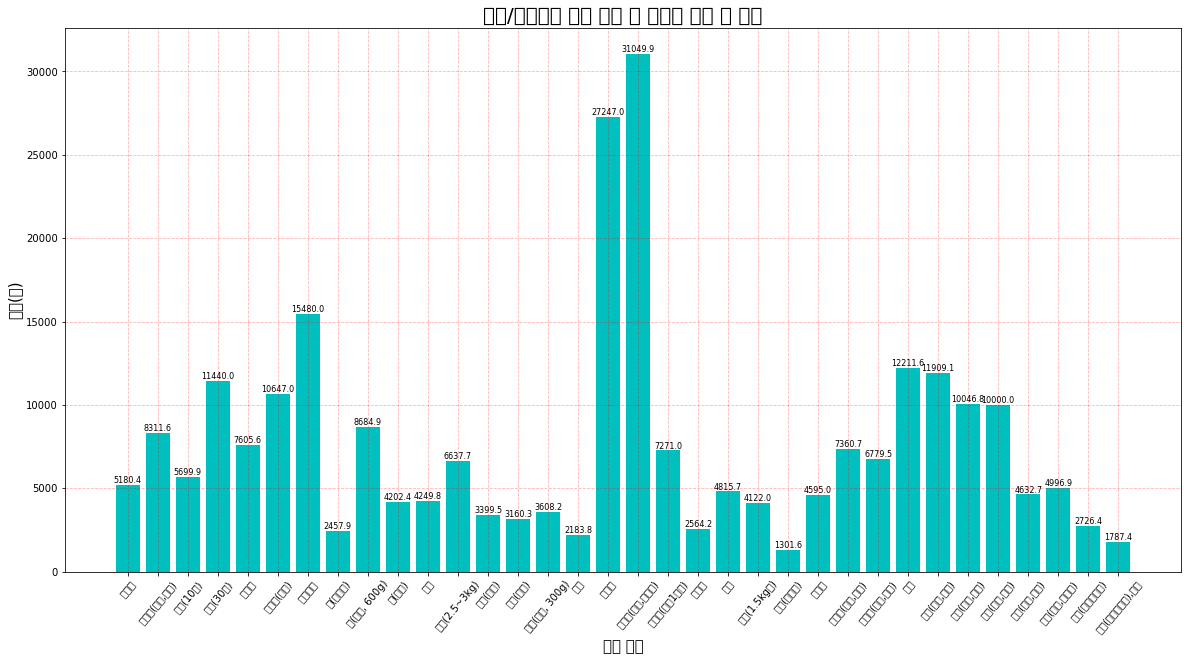

In [70]:
# 중구/대형마트 전체 품목 별 가격의 평균 값 시각화
x = junggu_mart_price_mean['품목 이름']
y = junggu_mart_price_mean['가격(원)']

plt.rcParams["figure.figsize"] = (20, 10) # 그래프 출력 크기 지정
plt.grid(True, color='r', alpha=0.3, linestyle='--') # 데이터의 위치를 더 명확하게 파악하기 위해 그리드 표시

plt.title("중구/대형마트 전체 품목 별 가격의 평균 값 비교", fontsize=20) # 그래프 제목
plt.xticks(rotation=50) # x 라벨 이름이 겹치지 않도록 90도 회전
plt.xlabel("품목 이름", fontsize=15) # x 라벨의 이름
plt.ylabel("가격(원)", fontsize=15) # y 라벨의 이름

bar1 = plt.bar(x, y, width=0.8, color='c') # 지정한 x, y의 값을 이용하여 막대 그래프 출력

# 막대 그래프 위에 y값 표시하기
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size=8)

plt.show()

<br></br>

### 3.5. '중구'의 전통시장에서 판매하는 품목 별 평균 가격대

In [71]:
compare_region

,시장/마트 이름,시장유형 구분(시장/마트) 이름,자치구 이름,품목 이름,가격(원)
0,롯데마트 구로점,대형마트,구로구,사과,1598
1,롯데마트 구로점,대형마트,구로구,배,1590
2,롯데마트 구로점,대형마트,구로구,배추,3990
3,롯데마트 구로점,대형마트,구로구,무,1990
4,롯데마트 구로점,대형마트,구로구,양파,990
...,...,...,...,...,...
89894,홈플러스 강동점,대형마트,강동구,달걀(30개),6490
89895,홈플러스 강동점,대형마트,강동구,"조기(국산,냉동)",1190
89896,홈플러스 강동점,대형마트,강동구,"명태(냉동,수입산)",3490
89897,홈플러스 강동점,대형마트,강동구,"오징어(냉동,국산)",4980


In [72]:
# 중구의 전통시장에서 판매하느 농수축산물 이름, 실판매규격, 가격(원)을 출력
junggu_market = compare_region[(compare_region['자치구 이름']=='중구') & (compare_region['시장유형 구분(시장/마트) 이름']=='전통시장')]
junggu_market

,시장/마트 이름,시장유형 구분(시장/마트) 이름,자치구 이름,품목 이름,가격(원)
85,남대문시장,전통시장,중구,"사과(부사, 300g)",1650
86,남대문시장,전통시장,중구,배(중품),4000
87,남대문시장,전통시장,중구,배추(중간),3000
88,남대문시장,전통시장,중구,무(세척무),1500
89,남대문시장,전통시장,중구,양파(1.5kg망),3700
...,...,...,...,...,...
88721,남대문시장,전통시장,중구,달걀(30개),7000
88722,남대문시장,전통시장,중구,"조기(냉동,수입산)",3500
88723,남대문시장,전통시장,중구,"명태(러시아,냉동)",4000
88724,남대문시장,전통시장,중구,"오징어(생물,국산)",4500


In [73]:
# 중구의 전통시장에서 판매하는 21개 종류의 농수축산물 목록
junggu_market.groupby("자치구 이름")["품목 이름"].value_counts().to_frame()

품목 이름
자치구 이름 품목 이름              
중구     달걀(10개)         106
       달걀(30개)         106
       닭고기             106
       명태(러시아,냉동)      106
       무(세척무)          106
       배(중품)           106
       배추(중간)          106
       사과(부사, 300g)    106
       상추(100g)        106
       양파(1.5kg망)      106
       오이(다다기)         106
       조기(냉동,수입산)      106
       호박(인큐베이터),중간    106
       돼지고기(생삼겹살)      104
       쇠고기(한우,불고기)     104
       고등어              89
       오징어              81
       오징어(생물,국산)       25
       고등어(생물,국산)       17
       돼지고기              2
       쇠고기               2

In [74]:
# 중구/전통시장의 전체 품목 별 가격의 평균 값(mean) 구하기
junggu_market_price_mean = junggu_market.groupby(['품목 이름'], as_index=False)['가격(원)'].mean()
junggu_market_price_mean

,품목 이름,가격(원)
0,고등어,3147.191011
1,"고등어(생물,국산)",4011.764706
2,달걀(10개),3316.509434
3,달걀(30개),7360.660377
4,닭고기,6518.867925
5,돼지고기,15250.000000
6,돼지고기(생삼겹살),14052.884615
7,"명태(러시아,냉동)",4299.056604
8,무(세척무),1867.924528
9,배(중품),3991.509434


C:\Users\dohoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dohoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dohoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dohoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dohoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dohoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51109 missing from c

C:\Users\dohoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dohoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dohoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dohoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dohoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47932 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dohoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44397 missing from current fon

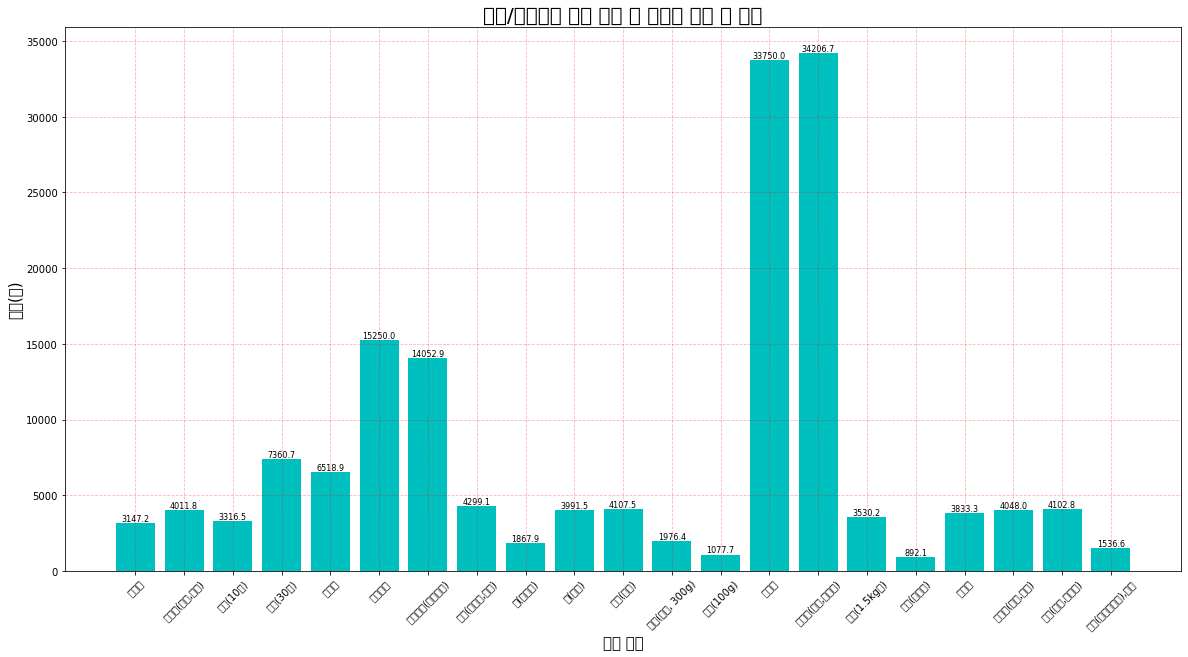

In [75]:
# 중구/전통시장 전체 품목 별 가격의 평균 값 시각화
x = junggu_market_price_mean['품목 이름']
y = junggu_market_price_mean['가격(원)']

plt.rcParams["figure.figsize"] = (20, 10) # 그래프 출력 크기 지정
plt.grid(True, color='r', alpha=0.3, linestyle='--') # 데이터의 위치를 더 명확하게 파악하기 위해 그리드 표시

plt.title("중구/전통시장 전체 품목 별 가격의 평균 값 비교", fontsize=20) # 그래프 제목
plt.xticks(rotation=45) # x 라벨 이름이 겹치지 않도록 90도 회전
plt.xlabel("품목 이름", fontsize=15) # x 라벨의 이름
plt.ylabel("가격(원)", fontsize=15) # y 라벨의 이름

bar2 = plt.bar(x, y, width=0.8, color='c') # 지정한 x, y의 값을 이용하여 막대 그래프 출력

# 막대 그래프 위에 y값 표시하기
for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size=8)
    
plt.show()

<br></br>

#### 3.5.1. 결론

*   가정 : 대형마트보다 전통시장의 물품 가격이 더 쌀 것으로 예상합니다.

*   결론 : 분석 결과 공통적으로 판매하는 항목을 비교하였을 때 전통시장의 품목 평균 가격이 실제로 더 저렴한 것으로 보입니다.
    * 판매하는 공통 항목 18가지를 비교 => 배추, 쇠고기 제외하고 전통시장에서 파는 농수축산물품의 가격이 더 저렴합니다.




C:\Users\dohoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dohoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dohoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dohoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dohoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dohoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54805 missing from cur

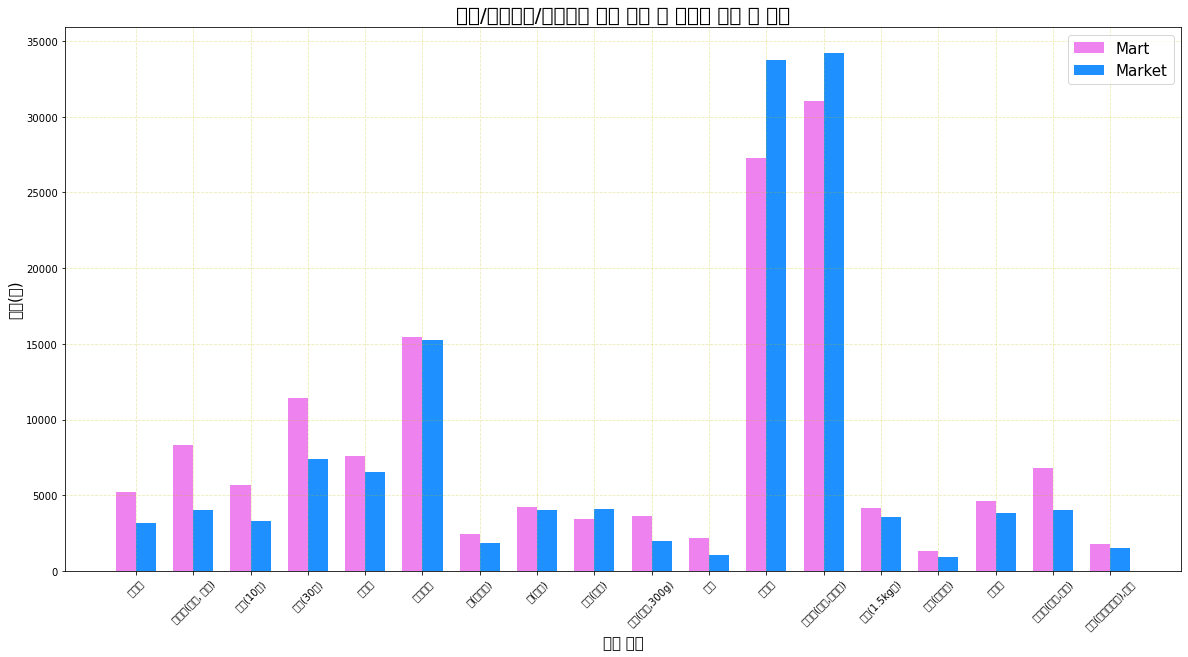

In [76]:
# 중구/대형마트/전통시장 그룹 막대그래프로 평균 가격 비교

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18] # x 위치의 변수들 설정
mart_y = [5180.4, 8311.6, 5699.9, 11440.0, 7605.6, 15480.0, 2457.9, 4202.4, 3399.5, 3608.2, 2183.8, 27247.0, 31049.9, 4122.0, 1301.6, 4595.0, 6779.5, 1787.4] # 대형마트 품목들의 가격
market_y = [3147.2, 4011.8, 3316.5, 7360.7, 6518.9, 15250.0, 1867.9, 3991.5, 4107.5, 1976.4, 1077.7, 33750.0, 34206.7, 3530.2, 892.1, 3833.3, 4048.0, 1536.6] # 전통시장 품목들의 가격
width = 0.35 # 그래프의 넓이 변수
# len(mart_y) => 대형마트와 전통시장의 공통 항목이 18개로 일치하는 것을 확인
# len(market_y) 

left_x_position = [] # 그룹화된 막대 그래프를 그릴 때, 왼쪽 그래프
for position in x: # 첫 번째 막대 그래프의 위치를 약간 왼쪽으로 가도록 조정
    left_x_position.append(position-width/2)
left_x_position

right_x_position = [] # 그룹화된 막대 그래프를 그릴 때, 오른쪽 그래프
for position in x: # 두 번째 막대 그래프의 위치를 약간 왼쪽으로 가도록 조정
    right_x_position.append(position+width/2)
right_x_position


plt.title("중구/대형마트/전통시장 전체 품목 별 가격의 평균 값 비교", fontsize=20) # 그래프 제목
plt.xlabel("품목 이름", fontsize=15) # x 라벨의 이름
plt.ylabel("가격(원)", fontsize=15) # y 라벨의 이름
plt.grid(True, color='y', alpha=0.3, linestyle='--') # 데이터의 위치를 더 명확하게 파악하기 위해 그리드 표시

plt.bar(left_x_position, mart_y, width=width, color='violet') # 왼쪽 막대 그래프 그리기
plt.bar(right_x_position, market_y, width=width,color='dodgerblue') # 오른쪽 막대 그래프 그리기

# x 라벨 이름 설정하기
ticklabel=['고등어', '고등어(생물, 국산)', '달걀(10개)', '달걀(30개)', '닭고기', '돼지고기', '무(세척무)', '배(중품)', '배추(중간)', '사과(부사,300g)','상추', '쇠고기', '쇠고기(한우,불고기)', '양파(1.5kg망)', '오이(다다기)', '오징어', '오징어(생물,국산)', '호박(인큐베이터),중간']
plt.xticks(x, ticklabel, fontsize=10, rotation=45)

# 그래프 범례 설정하기
plt.legend(('Mart', 'Market'), loc='upper right', fontsize=15)
plt.show()


<br></br>

### 3.6. 최종 결론
대형마트와 전통시장을 가장 많이 소유하고 있는 자치구를 선정하여 분석     
=> 자치구 '중구'가 대형마트 4개, 전통시장 2개, 총 6개로 가장 많은 것으로 나타났습니다.
<br></br>

* 첫 번째 가정 : 대형마트가 전통시장보다 농수축산물품 판매 다양성이 높을 것이다.
    * 결론 : 실제로 대형마트가 전통시장보다 다양성이 높은 것으로 나타났습니다.
        * 대형마트 : 38개의 종류
        * 전통시장 : 21개의 종류      
        * 대형마트/전통시장에서 공통적으로 판매하는 물품 : 18개의 종류      
<br></br>
* 두 번째 가정 : 판매 물품의 가격이 전체적으로 전통시장이 대형마트보다 더 저렴할 것이다.
    * 결론 : 공통적으로 판매하는 18개의 항목 중 전통시장의 두 가지 항목을 제외한 품목들이 모두 더 저렴한 것으로 나타났습니다.
        * 위의 그룹 막대 그래프를 통해 확인
<br></br>
<br></br>

### 3.7. 프로젝트 후기
인위적으로 만들어낸 데이터를 이용한 분석이 아닌 실제 공공 데이터를 이용한 이번 분석 경험이 저에게는 매우 의미있었습니다.    
폰트 깨짐으로 인한 오류, 발견하지 못했던 결측값이 분석하다 발견되었을 경우, 하나의 값이 지나치게 커서 그래프에 이상이 생겼을 때 등등의    
문제를 해결하면서 당황스러울 때도 있었습니다. 
그렇지만 분석 시 다양한 문제 해결 과정을 거치다 보면 다음 분석 때에는 더 빠른 해결이 가능할 것이며, 더 유익한 방향의 인사이트를 발굴 할 수 있을 것이라 기대합니다.
 